In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,plotly.graph_objects as go
#im adding a comment to check

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\udemy practice\Updated Content\Datasets\Practice datsets\e-shop data and description\e-shop clothing 2008.csv",sep=';')
df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


# Exploratory analysis

In [3]:
df.columns=df.columns.str.replace(' ','',regex=True)
df.columns

Index(['year', 'month', 'day', 'order', 'country', 'sessionID',
       'page1(maincategory)', 'page2(clothingmodel)', 'colour', 'location',
       'modelphotography', 'price', 'price2', 'page'],
      dtype='object')

In [4]:
df.shape

(165474, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  165474 non-null  int64 
 1   month                 165474 non-null  int64 
 2   day                   165474 non-null  int64 
 3   order                 165474 non-null  int64 
 4   country               165474 non-null  int64 
 5   sessionID             165474 non-null  int64 
 6   page1(maincategory)   165474 non-null  int64 
 7   page2(clothingmodel)  165474 non-null  object
 8   colour                165474 non-null  int64 
 9   location              165474 non-null  int64 
 10  modelphotography      165474 non-null  int64 
 11  price                 165474 non-null  int64 
 12  price2                165474 non-null  int64 
 13  page                  165474 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 17.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,165474.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
month,165474.0,5.585887,1.328160,4.0,4.0,5.0,7.0,8.0
day,165474.0,14.524554,8.830374,1.0,7.0,14.0,22.0,31.0
order,165474.0,9.817476,13.478411,1.0,2.0,6.0,12.0,195.0
country,165474.0,26.952621,7.150691,1.0,29.0,29.0,29.0,47.0
sessionID,165474.0,12058.417056,7008.418903,1.0,5931.0,11967.5,18219.0,24026.0
page1(maincategory),165474.0,2.400842,1.144420,1.0,1.0,2.0,3.0,4.0
colour,165474.0,6.227655,4.235606,1.0,3.0,4.0,9.0,14.0
location,165474.0,3.258198,1.713206,1.0,2.0,3.0,5.0,6.0
modelphotography,165474.0,1.260071,0.438674,1.0,1.0,1.0,2.0,2.0


In [7]:
df.isna().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
sessionID               0
page1(maincategory)     0
page2(clothingmodel)    0
colour                  0
location                0
modelphotography        0
price                   0
price2                  0
page                    0
dtype: int64

In [8]:
df.dtypes

year                     int64
month                    int64
day                      int64
order                    int64
country                  int64
sessionID                int64
page1(maincategory)      int64
page2(clothingmodel)    object
colour                   int64
location                 int64
modelphotography         int64
price                    int64
price2                   int64
page                     int64
dtype: object

In [9]:
for i in df.columns:
    if df[i].dtype=='O':
        df[i]=df[i].replace(' ','',regex=True)
        df[i]=df[i].str.lower()
        print(df[i].unique())
        

['a13' 'a16' 'b4' 'b17' 'b8' 'c56' 'c57' 'p67' 'p82' 'b31' 'b21' 'b24'
 'b27' 'a10' 'p1' 'p34' 'p33' 'c4' 'c7' 'c10' 'c17' 'p77' 'a34' 'a37'
 'c25' 'c21' 'c15' 'c53' 'b26' 'a11' 'c5' 'p60' 'p56' 'p55' 'p48' 'p50'
 'p42' 'p23' 'c49' 'b23' 'c19' 'c34' 'c40' 'c50' 'c42' 'a18' 'a1' 'b1'
 'b16' 'a3' 'b3' 'b30' 'p16' 'a2' 'a5' 'a41' 'b2' 'b13' 'b15' 'b9' 'b20'
 'b25' 'b33' 'b34' 'c2' 'c33' 'c35' 'c55' 'c59' 'p61' 'p62' 'a6' 'c47'
 'b32' 'a17' 'a7' 'a8' 'a9' 'a20' 'a32' 'c11' 'c22' 'p12' 'a4' 'a23' 'b12'
 'b10' 'c14' 'a12' 'a31' 'a15' 'b7' 'c8' 'c18' 'p2' 'p10' 'c26' 'c31'
 'a35' 'a36' 'c46' 'p29' 'a21' 'p63' 'p30' 'p32' 'p66' 'p57' 'p43' 'p4'
 'a28' 'b28' 'p15' 'a19' 'b19' 'b14' 'b6' 'a29' 'p49' 'c3' 'c9' 'c36'
 'c37' 'c39' 'c51' 'c52' 'a42' 'b29' 'b11' 'p6' 'p17' 'p11' 'c1' 'c13'
 'a14' 'a24' 'p20' 'p40' 'p51' 'p25' 'c44' 'c45' 'b22' 'a30' 'c58' 'c54'
 'a26' 'a33' 'a38' 'a39' 'p8' 'p19' 'p39' 'p80' 'p78' 'p76' 'a40' 'b5'
 'p3' 'p7' 'p14' 'p18' 'p35' 'c6' 'c12' 'c30' 'p5' 'p70' 'p36' 'p9' 'p

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='O':
        df[[i]]=df[[i]].apply(le.fit_transform)
        print(df[i].unique())

[  4   7  70  51  74 127 128 198 215  66  55  58  61   1 135 162 161 109
 132  77  84 209  27  30  93  89  82 124  60   2 120 191 186 185 177 180
 171 150 119  57  86 103 110 121 112   9   0  43  50  22  64  65 142  11
  38  35  53  47  49  75  54  59  68  69  87 102 104 126 130 192 193  39
 117  67   8  40  41  42  12  25  78  90 138  33  15  46  44  81   3  24
   6  73 133  85 146 136  94 100  28  29 116 156  13 194 158 160 197 187
 172 168  20  62 141  10  52  48  72  21 178  98 134 105 106 108 122 123
  36  63  45 190 143 137  76  80   5  16 147 169 181 152 114 115  56  23
 129 125  18  26  31  32 212 145 167 213 210 208  34  71 157 201 140 144
 163 131  79  99 179 202 164 216 153 182 195 165 200  14 111 139  83 175
 118 214 166 176 173 189 196 107  88  95  96 113 188 148 204 205  92 170
  97 203 101  91  19 206 199 207  17 154 151  37 159 183 174 184 155 149
 211]


array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'order'}>],
       [<AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'sessionID'}>,
        <AxesSubplot:title={'center':'page1(maincategory)'}>,
        <AxesSubplot:title={'center':'page2(clothingmodel)'}>],
       [<AxesSubplot:title={'center':'colour'}>,
        <AxesSubplot:title={'center':'location'}>,
        <AxesSubplot:title={'center':'modelphotography'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'price2'}>,
        <AxesSubplot:title={'center':'page'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

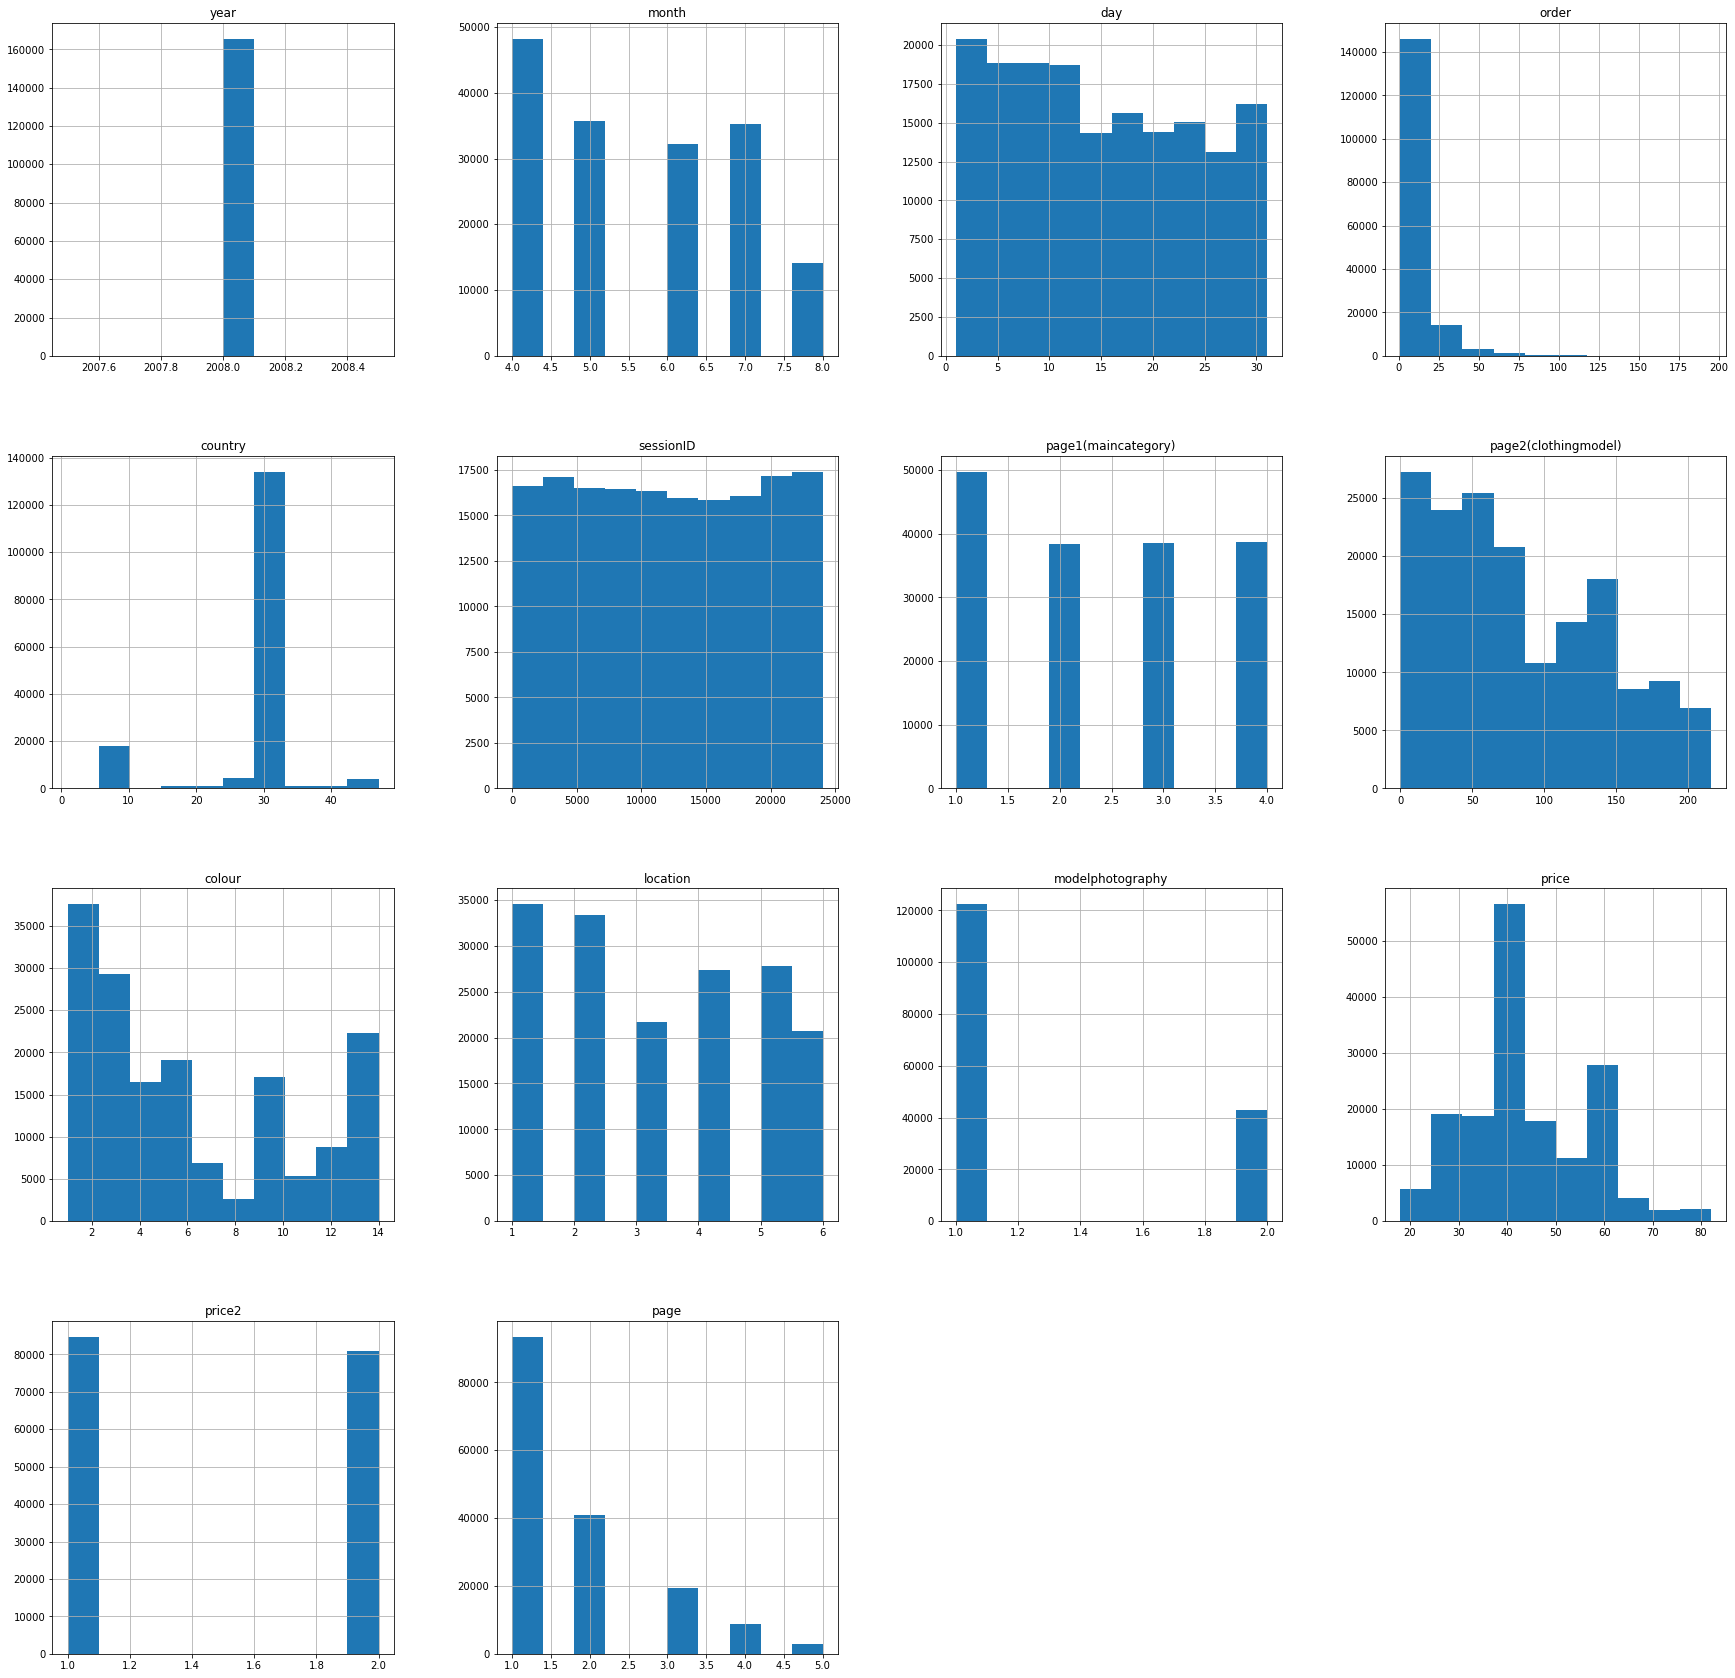

In [11]:
df.hist(bins=10,figsize=(30,30))#numerical columns distribution

<AxesSubplot:xlabel='count', ylabel='page1(maincategory)'>

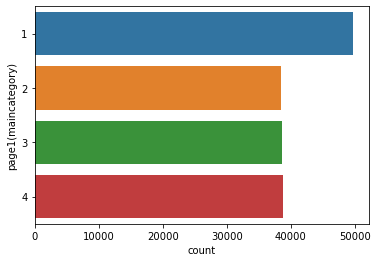

In [12]:
sns.countplot(data=df,y='page1(maincategory)')#for categorical data

<AxesSubplot:xlabel='country', ylabel='order'>

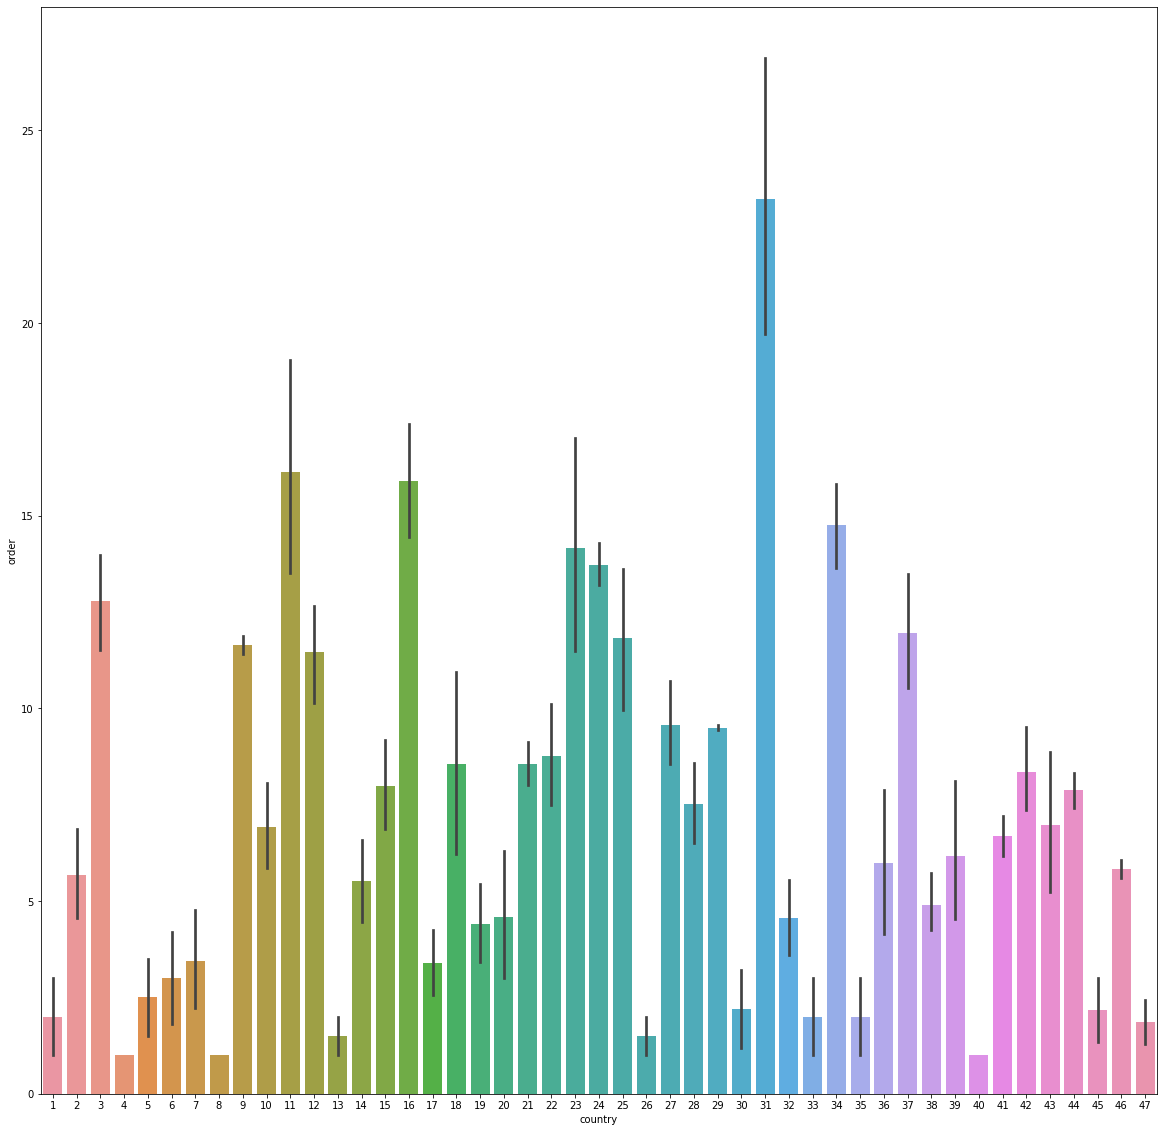

In [13]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['country'],y=df['order'])#for category vs numerical

<AxesSubplot:>

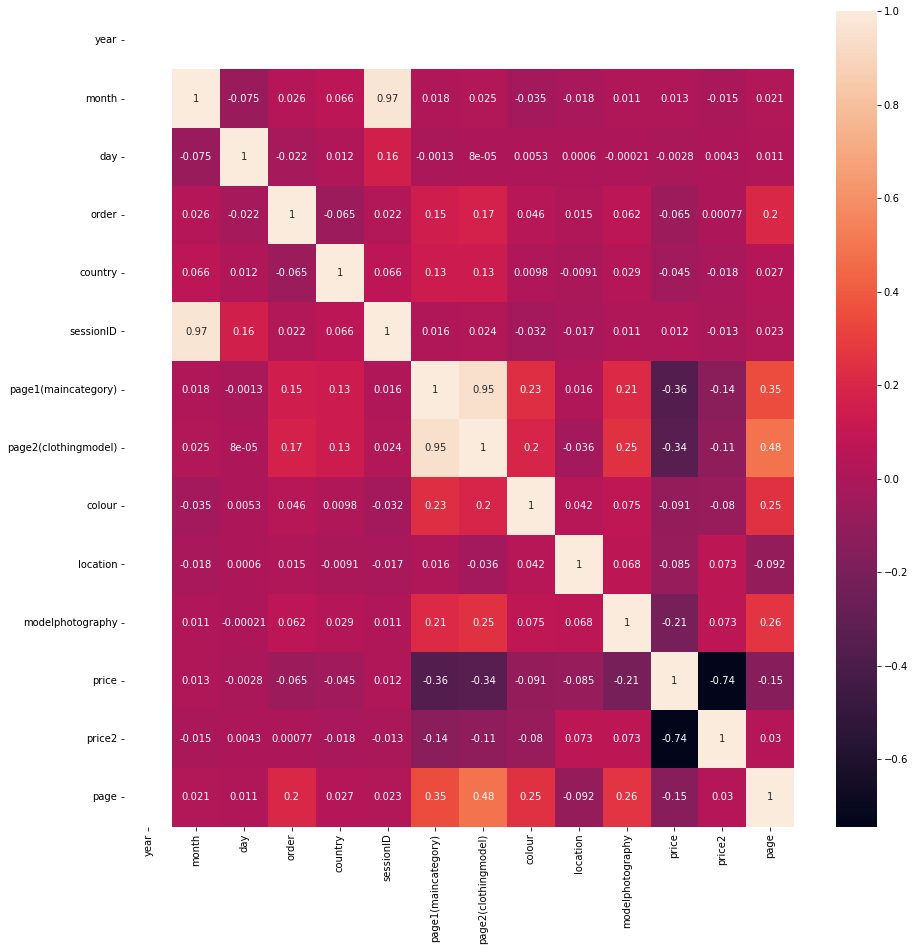

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)#for numerical vs numerical



# Data Cleaning

In [15]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
165469    False
165470    False
165471    False
165472    False
165473    False
Length: 165474, dtype: bool

In [16]:
df.drop_duplicates()

,year,month,day,order,country,sessionID,page1(maincategory),page2(clothingmodel),colour,location,modelphotography,price,price2,page
0,2008,4,1,1,29,1,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,87,12,1,1,43,1,1


In [17]:
df.isna().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
sessionID               0
page1(maincategory)     0
page2(clothingmodel)    0
colour                  0
location                0
modelphotography        0
price                   0
price2                  0
page                    0
dtype: int64

In [18]:
df.dropna()

,year,month,day,order,country,sessionID,page1(maincategory),page2(clothingmodel),colour,location,modelphotography,price,price2,page
0,2008,4,1,1,29,1,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,87,12,1,1,43,1,1


In [19]:
# from sklearn.impute import SimpleImputer as SI
# imputer=SI(missing_values=np.nan,strategy='mean')
# imputer.fit(data)
# x=imputer.transform(x)



# Feature Engineering

In [20]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preproceessing import OneHotEncoder
# ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
# x=ct.fit_transform(x)


# x y split

In [21]:
df.drop(['sessionID'],axis=1,inplace=True)
df

,year,month,day,order,country,page1(maincategory),page2(clothingmodel),colour,location,modelphotography,price,price2,page
0,2008,4,1,1,29,1,4,1,5,1,28,2,1
1,2008,4,1,2,29,1,7,1,6,1,33,2,1
2,2008,4,1,3,29,2,70,10,2,1,52,1,1
3,2008,4,1,4,29,2,51,6,6,2,38,2,1
4,2008,4,1,5,29,2,74,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,2,44,2,4,1,67,1,1
165470,2008,8,13,1,9,1,2,3,4,1,62,1,1
165471,2008,8,13,1,34,1,11,3,1,1,43,2,1
165472,2008,8,13,2,34,3,87,12,1,1,43,1,1


In [22]:
x=df.drop(['price'],axis=1).values
y=df['price'].values


# Train Test split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train_sc=sc_x.fit_transform(x_train)
x_test_sc=sc_x.transform(x_test)


# Regression

In [25]:
#metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [26]:
#linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

(78.60353209814865, 33.340995608962075, 4.385012927892924)

In [27]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_train_poly=poly_reg.fit_transform(x_train)
x_test_poly=poly_reg.transform(x_test)

reg=LinearRegression()
reg.fit(x_train_poly,y_train)
y_pred=reg.predict(x_test_poly)

r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

(87.16966928012107, 19.992832562611955, 3.271011926026948)

In [28]:
# #svr
# from sklearn.svm import SVC
# kernels=['linear','sigmoid','poly','rbf']
# for i in kernels:
#     reg=SVC(kernel='rbf')
#     reg.fit(x_train_sc,y_train)
#     y_pred=reg.predict(x_test_sc)
#     print(i)
#     print(r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred))
#     print('**********************************************')


In [29]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

(100.0, 0.0, 0.0)

In [30]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=30)
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

r2_score(y_test,y_pred)*100,mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred)

(99.99976149259126, 0.0003716536067522107, 0.0001389924057772494)

# Classification

In [31]:
x=df.drop(['country'],axis=1).values
y=df['country'].values


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [33]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train_sc=sc_x.fit_transform(x_train)
x_test_sc=sc_x.transform(x_test)


In [34]:
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [35]:
# #logistic regression
# from sklearn.linear_model import LogisticRegression
# cls=LogisticRegression()
# cls.fit(x_train,y_train)
# y_pred=cls.predict(x_test)

# accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

In [36]:
# #svc
# from sklearn.svm import SVC
# kernels=['linear','sigmoid','poly','rbf']
# for i in kernels:
#     cls=SVC(kernel=i)
#     cls.fit(x_train,y_train)
#     y_pred=cls.predict(x_test)

#     print(accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred))

In [37]:
#knn
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)

accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.7825876760066878,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [38]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
cls=GaussianNB()
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)

accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.6795318574622807,
 array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 6, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [39]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
cls=DecisionTreeClassifier(criterion='entropy')
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)

accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.7178252724452592,
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  1,  0],
        [ 0,  0,  3, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0, 50,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64))

In [40]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
cls=RandomForestClassifier(n_estimators=30,criterion='entropy')
cls.fit(x_train,y_train)
y_pred=cls.predict(x_test)

accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)

(0.7732409403138408,
 array([[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  1,  0],
        [ 0,  0,  1, ...,  0,  1,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0, 16,  0],
        [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64))


# Clustering

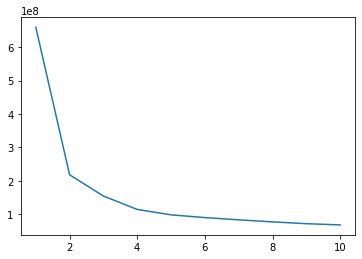

In [41]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [42]:
kmeans=KMeans(n_clusters=4,init='k-means++')
y_pred=kmeans.fit_predict(df)
y_pred



array([0, 0, 3, ..., 0, 3, 3])

In [43]:
df_h=df.sample(1500)
df_h

,year,month,day,order,country,page1(maincategory),page2(clothingmodel),colour,location,modelphotography,price,price2,page
118523,2008,7,3,13,29,1,24,6,5,2,62,1,2
66335,2008,5,16,17,29,1,0,8,1,1,28,2,1
15366,2008,4,8,5,29,4,146,3,1,1,28,2,1
129740,2008,7,13,37,29,4,162,9,6,2,48,1,2
99206,2008,6,15,1,29,3,81,9,5,1,23,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38237,2008,4,23,8,29,3,130,5,2,2,52,1,4
102644,2008,6,18,5,46,1,33,3,2,2,38,2,1
147724,2008,7,28,37,29,4,183,2,6,2,38,1,3
149790,2008,7,30,4,29,4,165,2,1,1,43,1,3


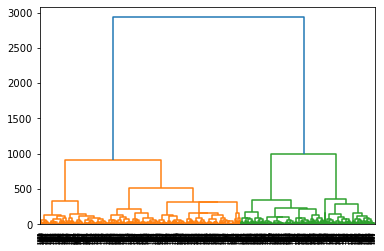

In [44]:
import scipy.cluster.hierarchy as sch
den=sch.dendrogram(sch.linkage(df_h,method='ward'))


In [45]:
from sklearn.cluster import AgglomerativeClustering
ag=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_pred=ag.fit_predict(df_h)
y_pred


array([1, 1, 0, ..., 0, 0, 1], dtype=int64)